In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/All Projects/CareerAdvancement/dataset.csv' -d '/content'

In [ ]:
import pandas as pd

data = pd.read_csv('dataset.csv', encoding='utf-8')
data['cleaned_text'] = ''
data.head()


Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \nMay 2013 to May 2017 B.E  ...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \n MCA   YMCAUST,  Faridabad...   

  cleaned_text  
0               
1               
2               
3               
4

In [ ]:
print("Distinct resume categories:")
print(data['Category'].unique())


Distinct resume categories:
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


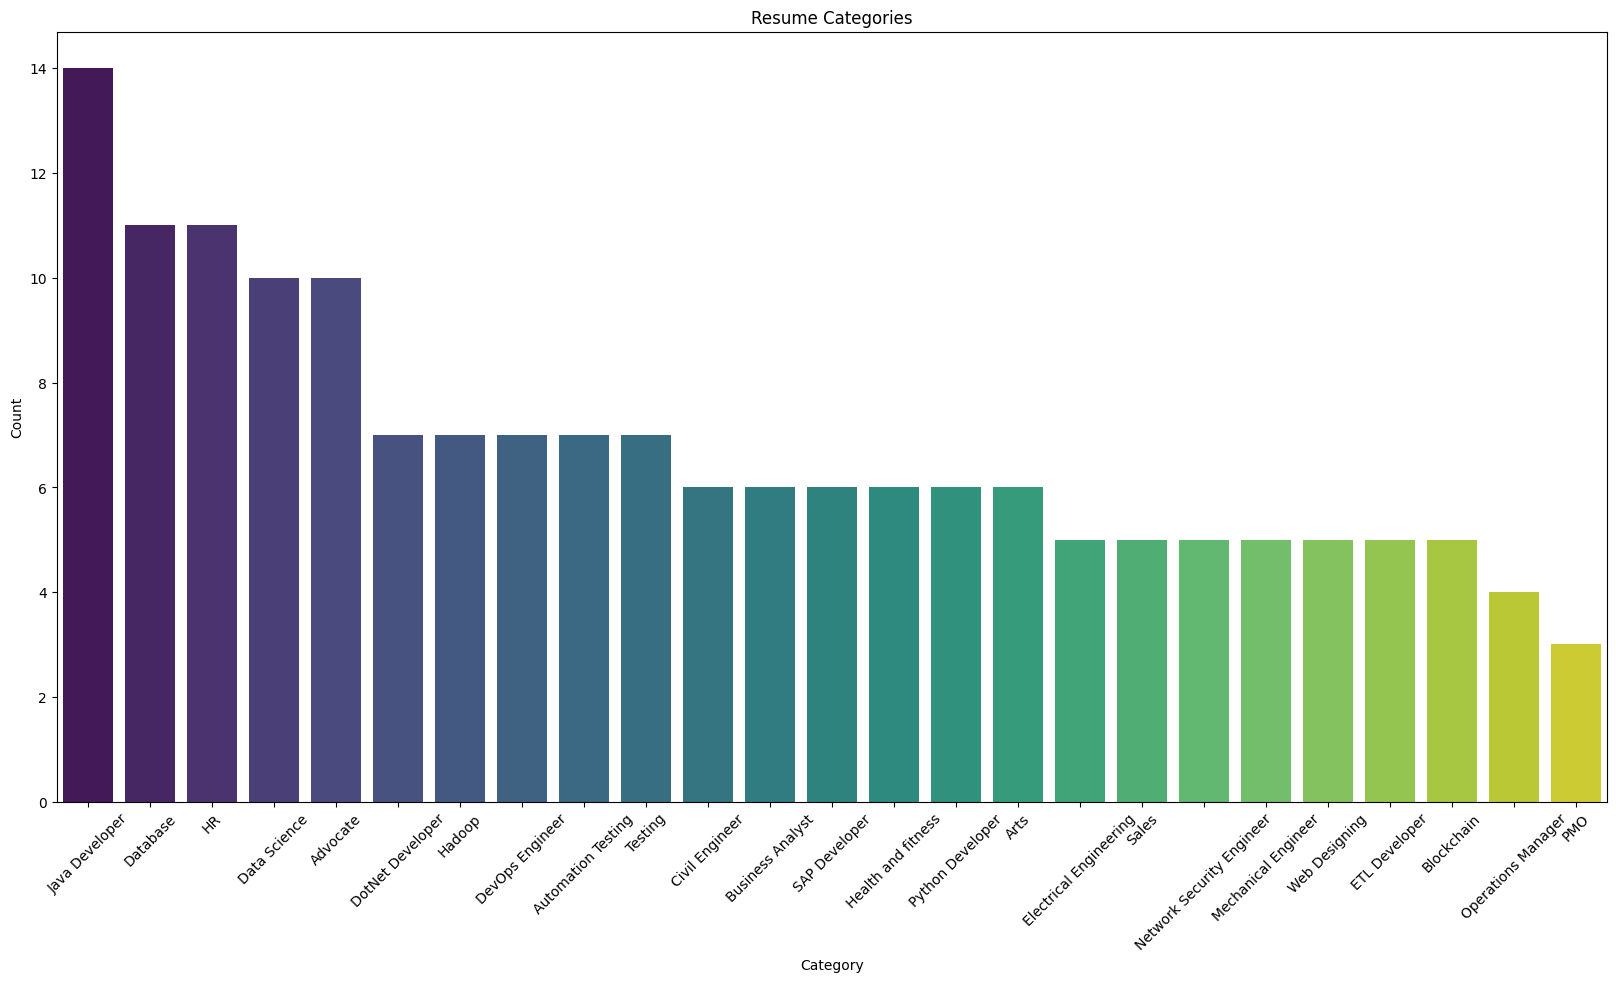

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of resumes in each category
category_counts = data['Category'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Resume Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


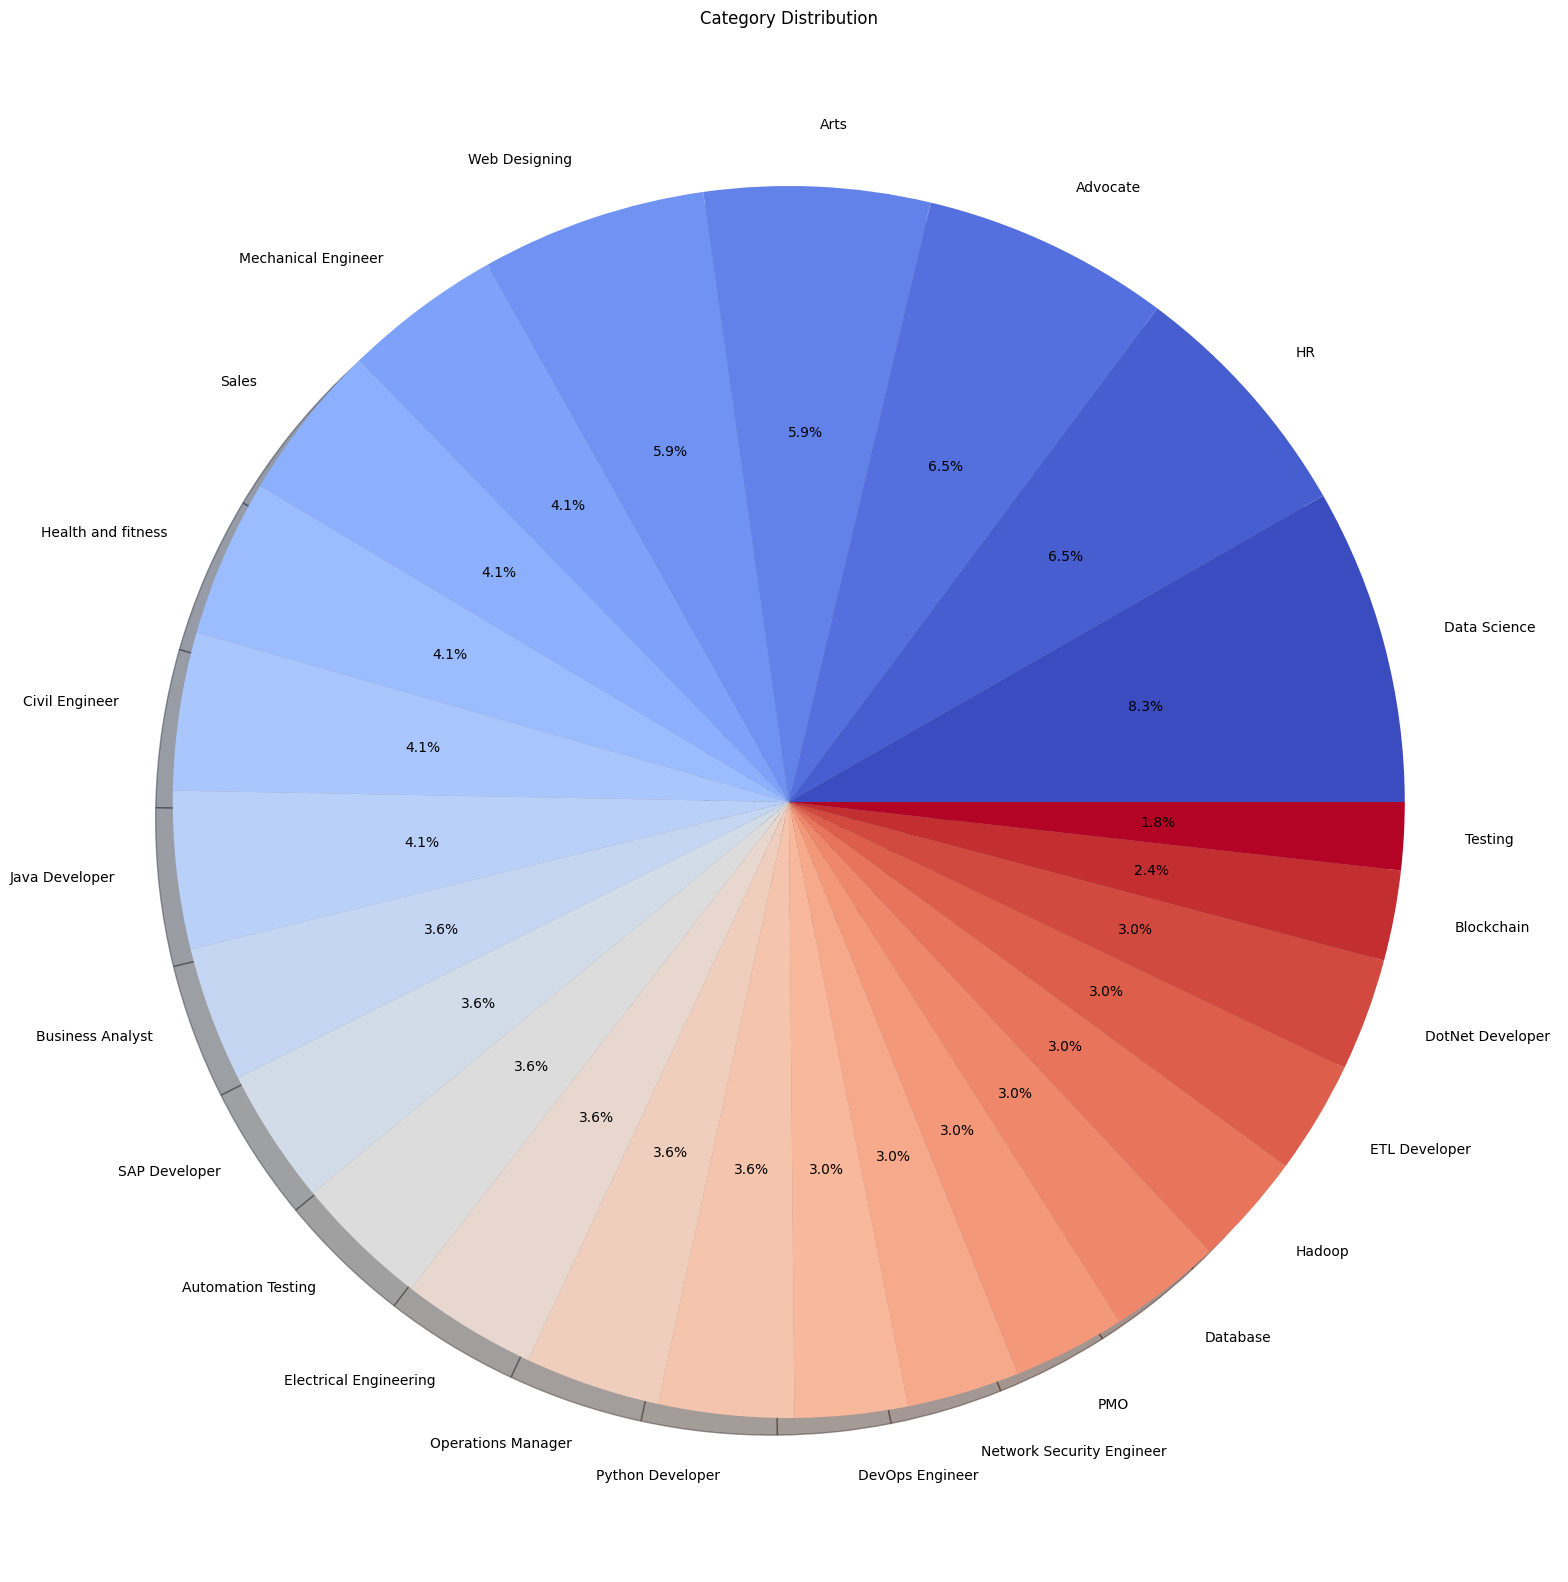

In [ ]:
from matplotlib.gridspec import GridSpec
import numpy as np

categories = data['Category'].value_counts()
unique_categories = data['Category'].unique()

plt.figure(figsize=(20, 20))
grid = GridSpec(1, 1)

color_map = plt.get_cmap('coolwarm')
category_colors = [color_map(i) for i in np.linspace(0, 1, len(unique_categories))]

plt.subplot(grid[0, 0], aspect=1, title='Category Distribution')
category_pie = plt.pie(categories, labels=unique_categories, autopct='%1.1f%%', shadow=True, colors=category_colors)
plt.show()


In [ ]:
import re

def clean_text(text):
    text = re.sub('http\S+\s*', ' ', text)
    text = re.sub('RT|cc', ' ', text)
    text = re.sub('#\S+', '', text)
    text = re.sub('@\S+', '  ', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text = re.sub(r'[^\x00-\x7f]', r' ', text)
    text = re.sub('\s+', ' ', text)
    return text

data['cleaned_text'] = data.Resume.apply(lambda x: clean_text(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


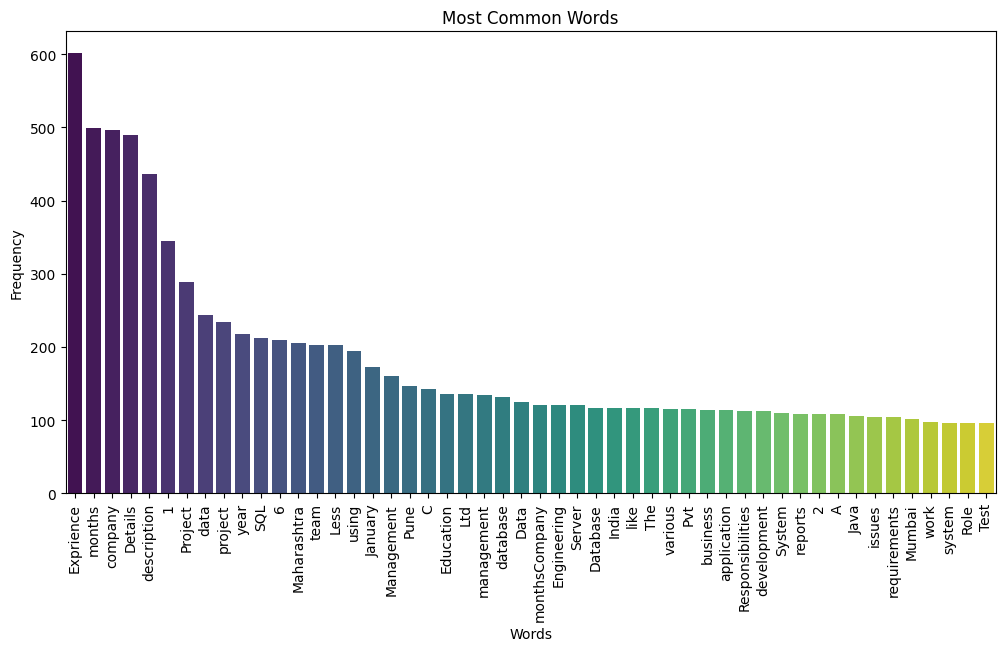

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

stop_words = set(stopwords.words('english') + ['``', "''"])
all_words = []
sentences = data['cleaned_text'].values
cleaned_sentences = ""

for i in range(0, 160):
    cleaned_text = clean_text(sentences[i])
    cleaned_sentences += cleaned_text
    required_words = nltk.word_tokenize(cleaned_text)
    for word in required_words:
        if word not in stop_words and word not in string.punctuation:
            all_words.append(word)

word_freq_dist = nltk.FreqDist(all_words)
most_common_words = word_freq_dist.most_common(50)

# Create a bar plot for the most common words using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words], palette="viridis")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=90)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Category']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Rename variables
text_data = data['cleaned_text'].values
target = data['Category'].values

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500
)

# Fit and transform the text data
tfidf_vectorizer.fit(text_data)
word_features = tfidf_vectorizer.transform(text_data)

print("Feature extraction completed...")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(word_features, target, random_state=0, test_size=0.2)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Feature extraction completed...
Training set shape: (135, 1500)
Testing set shape: (34, 1500)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=0)
mlp_classifier.fit(X_train, y_train)

# Make predictions
mlp_predictions = mlp_classifier.predict(X_test)

# Calculate and print accuracy
mlp_train_accuracy = accuracy_score(y_train, mlp_classifier.predict(X_train))
mlp_test_accuracy = accuracy_score(y_test, mlp_predictions)
print('Accuracy of MLP Classifier on training set: {:.2f}'.format(mlp_train_accuracy))
print('Accuracy of MLP Classifier on test set: {:.2f}'.format(mlp_test_accuracy))

# Print classification report
mlp_classification_report = classification_report(y_test, mlp_predictions)
print("\nClassification report for MLP classifier:\n%s\n" % mlp_classification_report)


Accuracy of MLP Classifier on training set: 1.00
Accuracy of MLP Classifier on test set: 0.76

Classification report for MLP classifier:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           9       1.00      0.75      0.86         4
          11       1.00      0.67      0.80         3
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         2
          14       1.00      0.67      0.80         3
          15       0.50      1.00      0.67         2
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.67         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

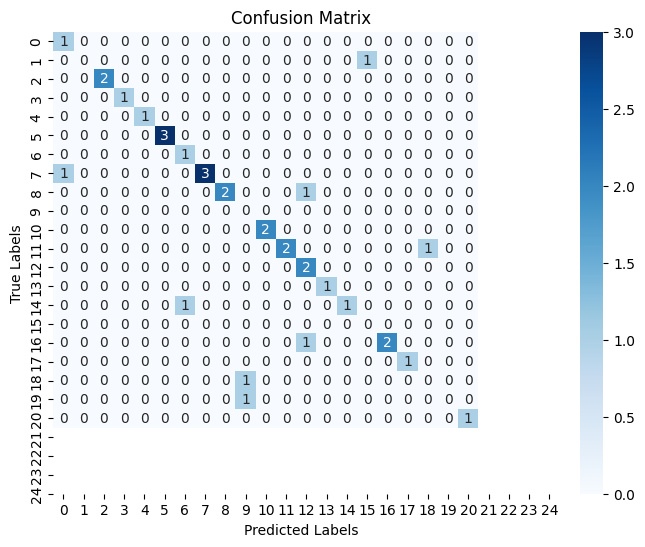

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

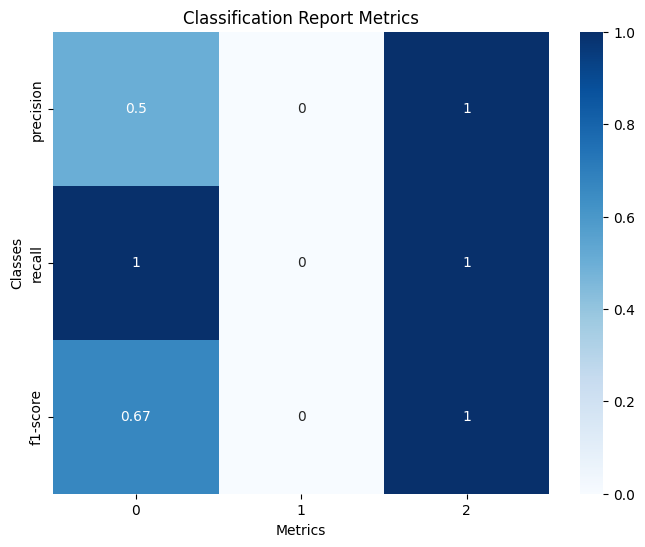

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, mlp_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=mlp_classifier.classes_, yticklabels=mlp_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the classification report metrics
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame.from_dict(classification_report(y_test, mlp_predictions, output_dict=True)).iloc[:-1, :3], annot=True, cmap="Blues")
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification Report Metrics')
plt.show()
